In [2]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import time
from spacytextblob.spacytextblob import SpacyTextBlob

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
sds_text = pd.read_csv('../data/sds_text.csv')

<IPython.core.display.Javascript object>

In [5]:
sds_text = sds_text.set_index('Unnamed: 0')

In [6]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fc108013b80>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fc1080131c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fc14a220900>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7fc108013700>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fc1282221c0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fc128256840>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fc14a2209e0>)]

In [7]:
nlp.add_pipe("spacytextblob")

In [8]:
nlp.components

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7fc108013b80>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fc1080131c0>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fc14a220900>),
 ('senter', <spacy.pipeline.senter.SentenceRecognizer at 0x7fc108013700>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fc1282221c0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fc128256840>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fc14a2209e0>),
 ('spacytextblob',
  <spacytextblob.spacytextblob.SpacyTextBlob at 0x7fc128f7cca0>)]

In [ ]:
#sds_1 = sds_text[sds_text['episode_number'] == 1]

In [10]:
def sentiment_analysis(text):
    global sds_text
    doc = nlp(text)
    polarity = doc._.blob.polarity
    #subjectivity = doc._.subjectivity
    #assessment = doc._.assessment
    return polarity

In [11]:
sds_text['sentiments'] = sds_text['episode_split_text'].apply(sentiment_analysis)

In [12]:
sds_text

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_day,host_episode,speaker,episode_split_text,sentiments
Unnamed: 0,,,,,,,,,,,,,
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,This is episode number one with ex-chemical e...,0.257792
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,"Hey guys, welcome to the Podcast. I’ve got Ru...",0.566667
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,Thank you! Thanks for having me over. I’m doi...,0.500000
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Kirill,Awesome. It’s great to hear you and for those...,0.463636
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,"Yeah sure. So, I’m the senior manager of anal...",0.369388
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Yeah, right. Yeah, as I mean, it actually, it ...",0.199031
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Matar Haller,Happy to.,0.800000
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Nice. Well, yeah, so you mentioned potentially...",0.320000


In [32]:
sds_text['guest_info']

Unnamed: 0
0      Subscribe on Website, Apple Podcasts, Spotify,...
0      Subscribe on Website, Apple Podcasts, Spotify,...
0      Subscribe on Website, Apple Podcasts, Spotify,...
0      Subscribe on Website, Apple Podcasts, Spotify,...
0      Subscribe on Website, Apple Podcasts, Spotify,...
                             ...                        
681    Subscribe on Website, Apple Podcasts, Spotify,...
681    Subscribe on Website, Apple Podcasts, Spotify,...
681    Subscribe on Website, Apple Podcasts, Spotify,...
681    Subscribe on Website, Apple Podcasts, Spotify,...
681    Subscribe on Website, Apple Podcasts, Spotify,...
Name: guest_info, Length: 46772, dtype: object

<Axes: xlabel='Unnamed: 0'>

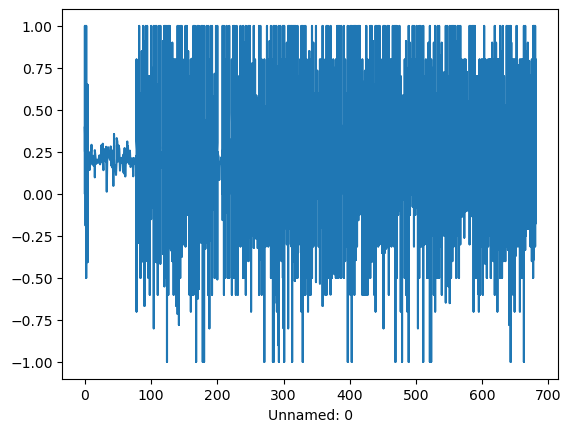

In [30]:
sds_text['sentiments'].plot()

In [16]:
sds_text['sentiments'].describe()

count    46772.000000
mean         0.189427
std          0.207627
min         -1.000000
25%          0.006677
50%          0.182500
75%          0.300000
max          1.000000
Name: sentiments, dtype: float64

In [24]:
sentiments = pd.DataFrame(sds_text.groupby(['episode_number', 'context_episode', 'episode_date', 'speaker'])['sentiments'].mean())

<IPython.core.display.Javascript object>

In [27]:
sentiments

sentiments
episode_number context_episode                             episode_date speaker                  
1              Business Data Science Database              Sep 10, 2016 Kirill           0.294579
                                                                        Ruben            0.165573
2              Machine Learning Data Science               Sep 14, 2016 Hadelin          0.240974
                                                                        Kirill           0.270224
3              Machine Learning R Programming Data Science Sep 25, 2016 Kirill           0.207742
...                                                                                           ...
681            Machine Learning Data Science Python        May 23, 2023 Matt Harrison    0.213919
682            Business Data Science                       May 26, 2023 Jon Krohn        0.150311
                                                                        Mico Yuk         0.133724
683            Data Science Artificial Intelligence        May 30, 2023 Jon Krohn        0.182802
                                                                        Matar Haller     0.201029

[841 rows x 1 columns]

In [29]:
sentiments['context_episode'].unique()

KeyError: 'context_episode'

In [28]:
sentiments[sentiments['context_episode'] == 'Data Science Artificial Intelligence']

KeyError: 'context_episode'

In [18]:
sds_text[sds_text['sentiments'] < 0]

,episode_name,length_episode,context_episode,guest_name,guest_info,text_episode,episode_number,episode_date,episode_day,host_episode,speaker,episode_split_text,sentiments
Unnamed: 0,,,,,,,,,,,,,
0,"Ruben Kogel on Self-Serve Analytics, R vs Pyt...",42,Business Data Science Database,Ruben Kogel,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is episode number one with ex-che...,1,"Sep 10, 2016",Saturday,Kirril Eremenko,Ruben,"Yeah. Totally. Surprisingly, it is not the da...",-0.000031
1,"Machine Learning, Recommender Systems and the...",51,Machine Learning Data Science,Hadelin de Ponteves,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is session number two with machin...,2,"Sep 14, 2016",Wednesday,Jon Krohn,Kirill,"Sorry, if I’m going to interrupt you quickly. ...",-0.006061
1,"Machine Learning, Recommender Systems and the...",51,Machine Learning Data Science,Hadelin de Ponteves,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is session number two with machin...,2,"Sep 14, 2016",Wednesday,Jon Krohn,Kirill,Why would you say you have slight preference f...,-0.166667
1,"Machine Learning, Recommender Systems and the...",51,Machine Learning Data Science,Hadelin de Ponteves,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is session number two with machin...,2,"Sep 14, 2016",Wednesday,Jon Krohn,Hadelin,"Yes, a little bit.",-0.187500
1,"Machine Learning, Recommender Systems and the...",51,Machine Learning Data Science,Hadelin de Ponteves,"Subscribe on Website, Apple Podcasts, Spotify,...",Kirill: This is session number two with machin...,2,"Sep 14, 2016",Wednesday,Jon Krohn,Kirill,"Yeah. Exactly, right. That’s the stuff that th...",-0.005952
...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,"Business Intelligence Tools, with Mico Yuk",28,Business Data Science,Mico Yuk,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:05\tThis is episode number 682 ...,682,"May 26, 2023",Friday,Jon Krohn,Mico Yuk,"And it, and it just sabotages like somebody to...",-0.071250
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"Like, yeah, it's crazy in the US to me that pe...",-0.175000
681,"Contextual A.I. for Adapting to Adversaries, ...",81,Data Science Artificial Intelligence,Matar Haller,"Subscribe on Website, Apple Podcasts, Spotify,...",Jon Krohn:\t00:00:05\tThis is episode number 6...,683,"May 30, 2023",Tuesday,Jon Krohn,Jon Krohn,"But yes, [crosstalk] back is small.",-0.125000


In [ ]:
sds_1['sentiments'] = sds_1['episode_split_text'].apply(sentiment_analysis)

In [ ]:
sds_1

In [ ]:
sds_1['sentiment_polarity'] = None
sds_1['sentiment_subjectivity'] = None
sds_1['sentiment_assessment'] = None

In [ ]:
sds_1

In [ ]:
def sentiment_analysis(text):
    global sds_1  # Assuming `sds_1` is a global variable or defined outside the function
    
    doc = nlp(text)  # Process the text string
    
    polarity = doc._.polarity  # Access the polarity from the processed document
    subjectivity = doc._.subjectivity  # Access the subjectivity from the processed document
    assessment = doc._.assessments  # Access the sentiment assessments from the processed document
    
    sds_1['sentiment_polarity'] = polarity
    sds_1['sentiment_subjectivity'] = subjectivity
    sds_1['sentiment_assessment'] = assessment

In [ ]:
sds_text['sentiment_polarity'] = None
sds_text['sentiment_subjectivity'] = None
sds_text['sentiment_assessment'] = None

In [ ]:
from spacy.tokens import Doc

def set_sentiment_assessments(doc, assessments):
    doc._.set("sentiment_assessments", assessments)

# Register the extension attribute
Doc.set_extension("sentiment_assessments", default=None)

In [ ]:
len(sds_1)

In [ ]:
sds_1['episode_split_text'].apply(sentiment_analysis)

In [ ]:
sds_1

In [ ]:
sentiment_analysis(sds_text['episode_split_text'])

In [ ]:
ds_1['sentiments'] = ds_1['episode_split_text'].apply(sentiment_analysis)

In [ ]:
ds_1

In [ ]:
ds_1['sentiments'].loc[0]